<a href="https://colab.research.google.com/github/nisha1365/TECHNICAL_TRAINING_CTS/blob/main/Nisha_2211566_Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import matplotlib.pyplot as plt

# **Data**
CIFAR-10 is a dataset of 50,000 32x32 color raining images, labeled over 10 categories and 10,000 test images.

In [ ]:
from tensorflow.keras.datasets import cifar10
(x_train,y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_train[0].shape

(32, 32, 3)

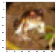

In [ ]:
# FROG
plt.figure(figsize = (6,4),dpi = 16 )
plt.imshow(x_train[0])

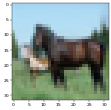

In [ ]:
#Horse
plt.figure(figsize = (6,4),dpi = 32 )
plt.imshow(x_train[12])

# **PreProcessing**

In [ ]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
x_train[0].shape

(32, 32, 3)

In [ ]:
x_train.max()

255

In [ ]:
x_train = x_train/255

In [ ]:
x_test = x_test/255

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

# **Label**

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
y_cat_train = to_categorical(y_train, 10)

In [ ]:
y_cat_train.shape

(50000, 10)

In [ ]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
y_cat_test = to_categorical(y_test, 10)

In [ ]:
y_cat_test.shape

(10000, 10)

In [ ]:
y_cat_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

Building the Model

In [ ]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential()

In [ ]:
# FIRST SET OF LAYERS

# CONVOLUTION LAYER
model.add(Conv2D(filters = 32, kernel_size = (4,4),
                 input_shape = (32,32,3), activation = 'relu'))


In [ ]:
# POOLING LAYER
model.add(MaxPool2D(pool_size = (2,2)))

In [ ]:
## SECOND SET OF LAYERS

# CONVOLUTION LAYER
model.add(Conv2D(filters = 32, kernel_size = (4,4),
                 input_shape = (32,32,3), activation = 'relu'))

In [ ]:
#Pooling layer
model.add(MaxPool2D(pool_size = (2,2)))

In [ ]:
# Flatten  images from 28 by 28  to 764 BEFORE FINAL LAYER
model.add(Flatten())

In [ ]:
# 256 Neurons in dense hidden layer ()
model.add(Dense(256,activation = 'relu'))

In [ ]:
# last layer is the classifier, THUS 10 possible classes
model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 256)              

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 3)

In [ ]:
model.fit(x_train, y_cat_train, epochs = 10, 
          validation_data = (x_test,y_cat_test), 
          callbacks = [early_stop])

Epoch 1/5
1563/1563 [==============================] - 73s 46ms/step - loss: 1.5278 - accuracy: 0.4512 - val_loss: 1.3005 - val_accuracy: 0.5409
Epoch 2/5
1563/1563 [==============================] - 89s 57ms/step - loss: 1.1728 - accuracy: 0.5874 - val_loss: 1.2089 - val_accuracy: 0.5828
Epoch 3/5
1563/1563 [==============================] - 83s 53ms/step - loss: 1.0190 - accuracy: 0.6456 - val_loss: 1.1893 - val_accuracy: 0.5981
Epoch 4/5
1563/1563 [==============================] - 99s 63ms/step - loss: 0.9121 - accuracy: 0.6846 - val_loss: 1.0215 - val_accuracy: 0.6493
Epoch 5/5
1563/1563 [==============================] - 87s 56ms/step - loss: 0.8374 - accuracy: 0.7142 - val_loss: 1.1233 - val_accuracy: 0.6243


In [ ]:
model.save('cifar_10epochs.h5')

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.527832,0.45116,1.300487,0.5409
1,1.172781,0.58744,1.208943,0.5828
2,1.018961,0.64560,1.189321,0.5981
3,0.912095,0.68462,1.021522,0.6493
4,0.837418,0.71416,1.123306,0.6243


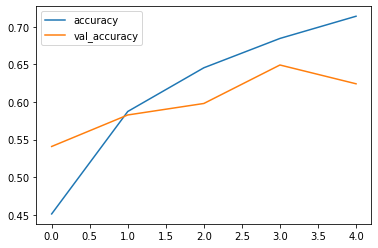

In [ ]:
losses[['accuracy','val_accuracy']].plot();

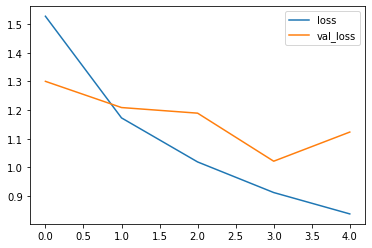

In [ ]:
losses[['loss','val_loss']].plot();

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose = 0))

['loss', 'accuracy']
[1.1233059167861938, 0.6243000030517578]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
predict_x = model.predict(x_test)
predict_classes = np.argmax(predict_x,axis=1)

313/313 [==============================] - 4s 13ms/step


In [ ]:
print(classification_report(y_test,predict_classes))

In [ ]:
confusion_matrix(y_test,predict_classes)

array([[600,  67,  21,  23,  16,   5,  11,  22,  92, 143],
       [  8, 763,   1,   4,   1,   1,   5,   2,  12, 203],
       [ 60,  23, 372, 109,  86,  80,  96,  73,  22,  79],
       [  7,  29,  21, 474,  51, 114,  88,  73,  16, 127],
       [ 14,  18,  25,  76, 509,  24,  98, 154,  21,  61],
       [  5,  14,  27, 226,  42, 427,  60,  95,  12,  92],
       [  5,  17,  17,  63,  34,  26, 728,  20,   6,  84],
       [  7,  15,  12,  30,  22,  24,  16, 771,   5,  98],
       [ 39,  87,   9,  15,   2,   3,   6,   7, 690, 142],
       [  3,  50,   3,   7,   1,   3,   4,  12,   8, 909]])

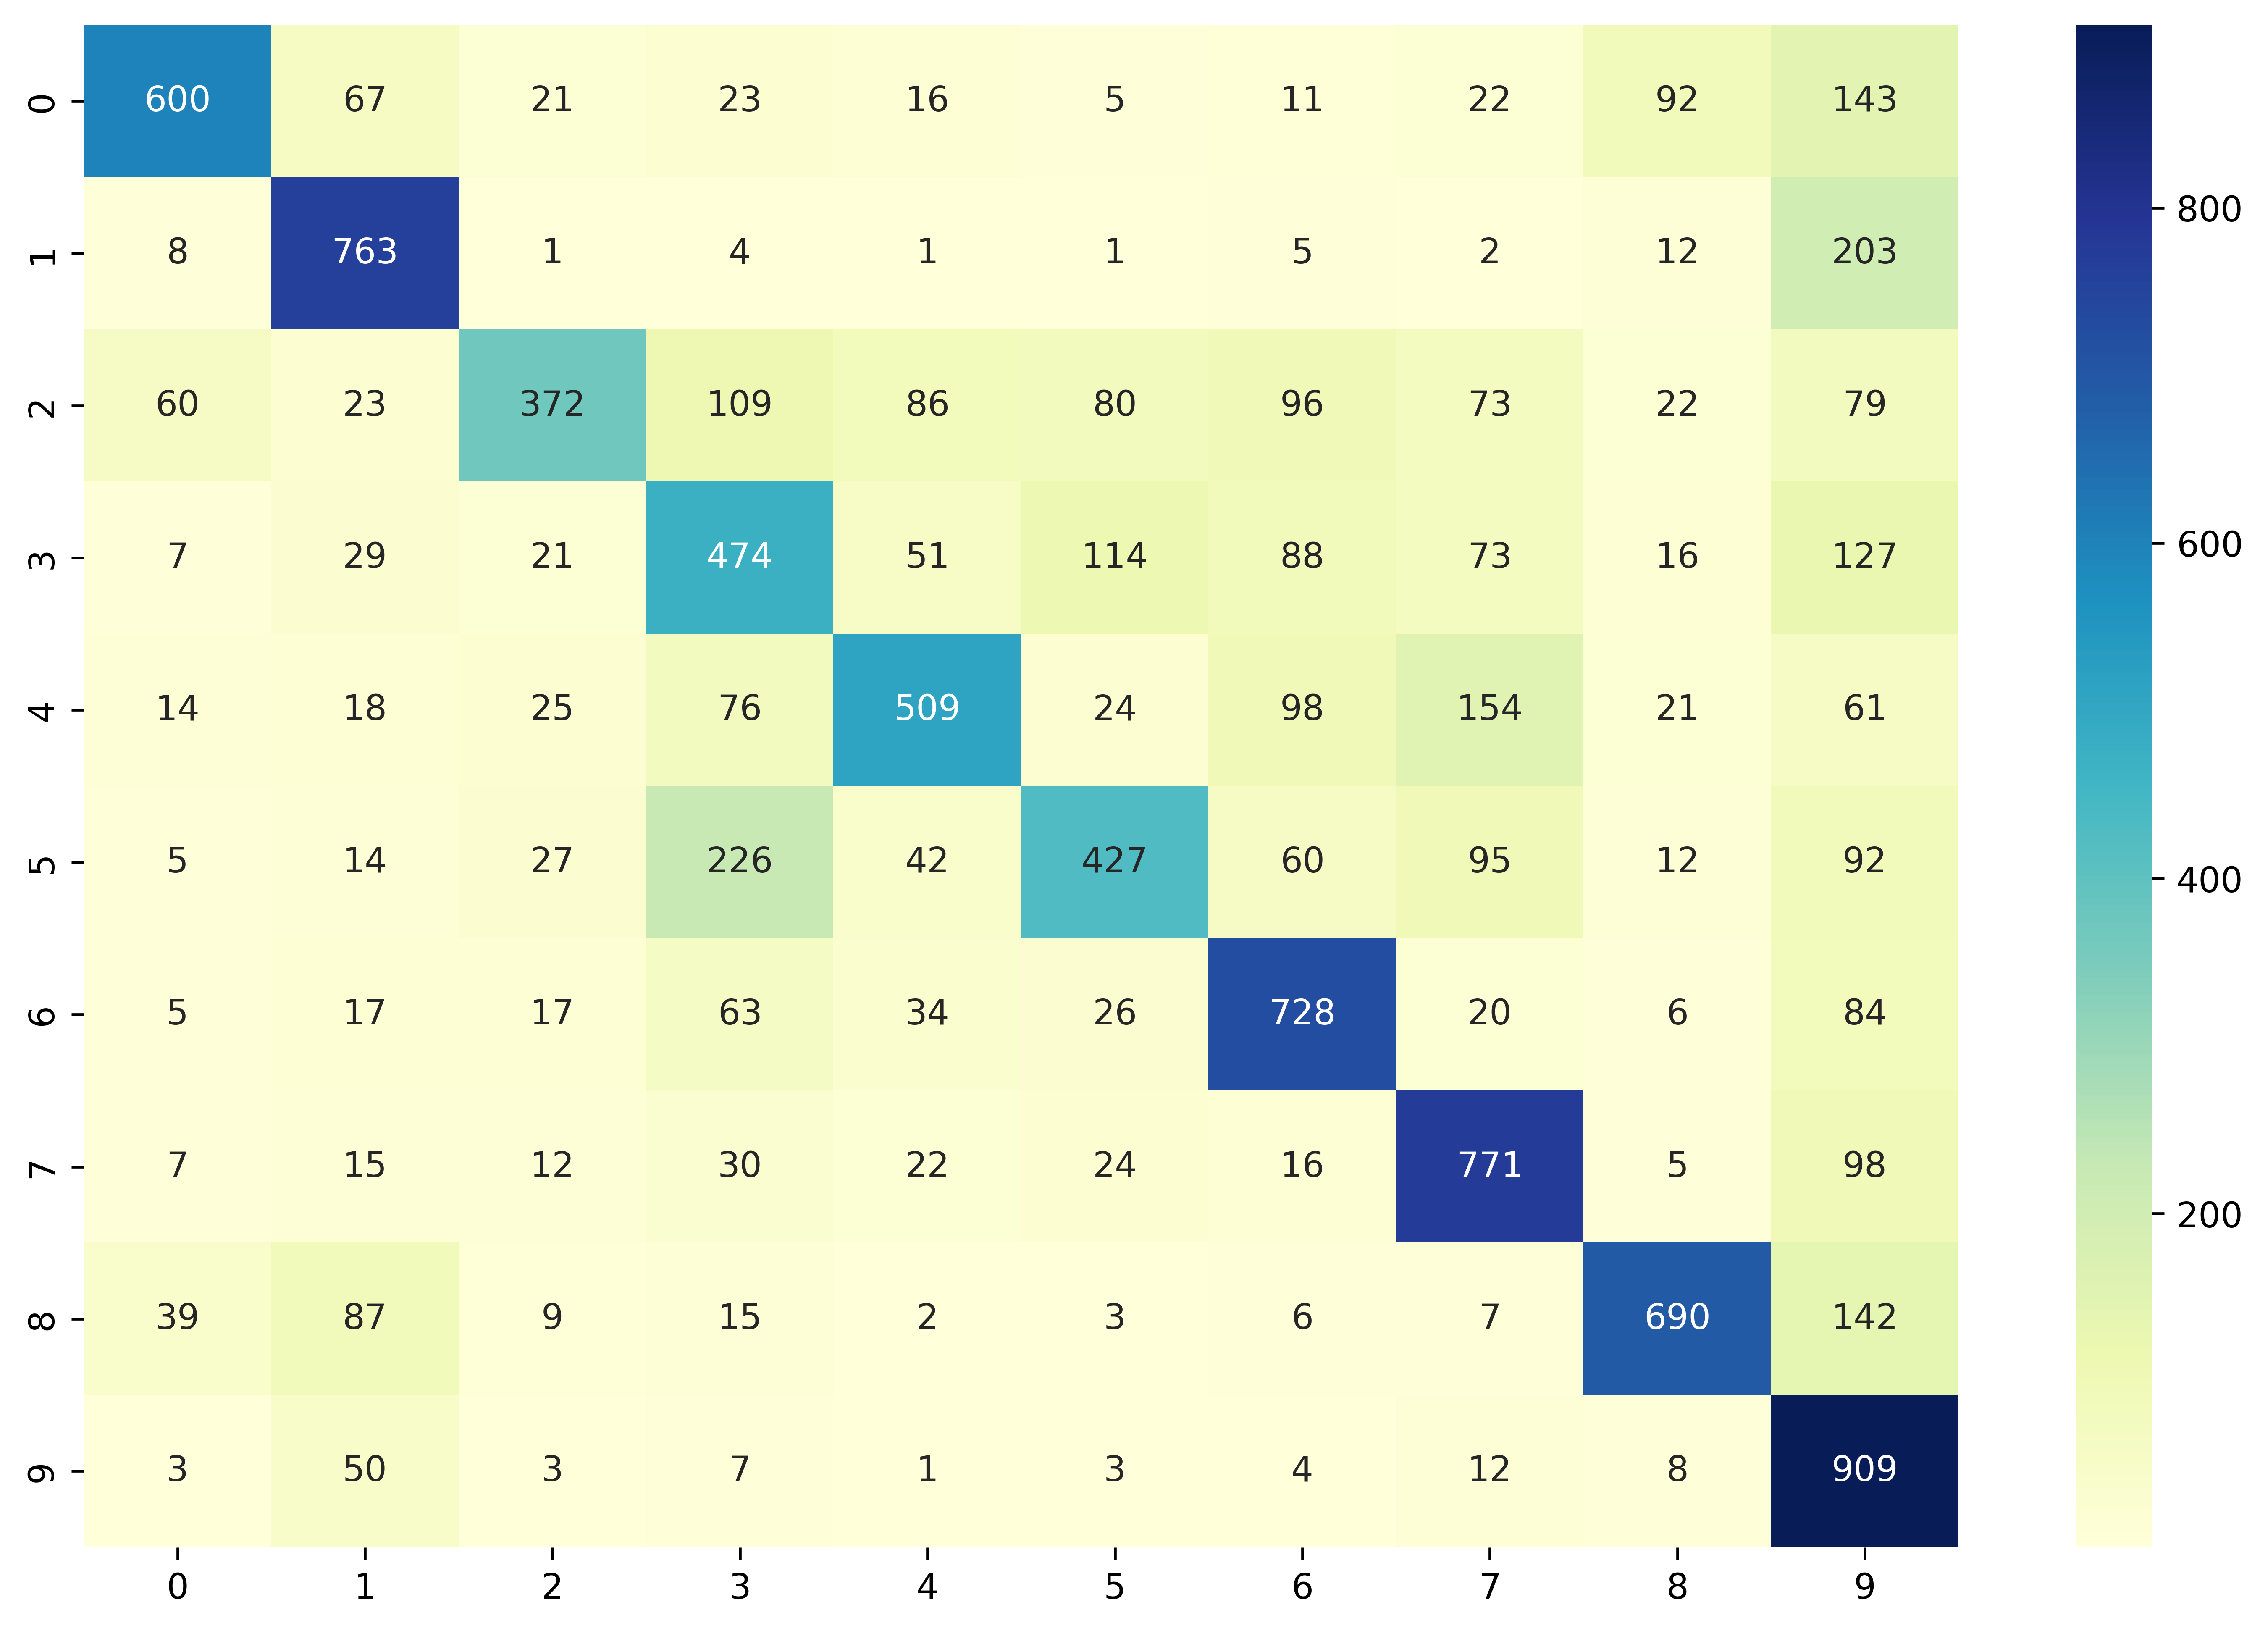

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,8), dpi = 600)
sns.heatmap(confusion_matrix(y_test,predict_classes),cmap="YlGnBu", annot=True, fmt='g');

Predicting a given image

In [ ]:
my_image = x_test[10]

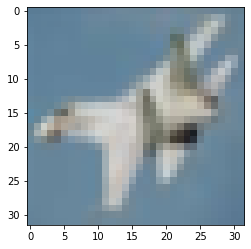

In [ ]:
plt.imshow(my_image)

In [ ]:
my_image = x_test[17]

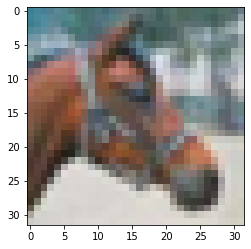

In [ ]:
plt.imshow(my_image)

In [ ]:
np.set_printoptions(formatter = {'float_kind': '{:f}'.format})
# SHAPE --> (num_images,width,height,color_channels)
model.predict(my_image.reshape(1,32,32,3))

1/1 [==============================] - 0s 21ms/step


array([[0.043473, 0.010918, 0.012903, 0.200331, 0.069215, 0.109250,
        0.010007, 0.224237, 0.007106, 0.312559]], dtype=float32)

The CIFAR-10 and CIFAR-100 are labeled subsets of the 80 million 